In [2]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
with open('./MC1.TXT') as f:
    lines = f.readlines()

print(lines[0:5])

['cook creates complicated dish, experienced chef prepares complicated dish, 1\n', 'skilful programmer creates code, devoted hacker writes code, 1\n', 'skilful cook creates meal, devoted hacker creates complicated code, 0\n', 'hacker writes code, skilful hacker creates code, 1\n', 'devoted hacker writes code, hacker writes complicated code, 1\n']


In [4]:
data = []
labels = []
for line in lines:
    val = line.split(',')
    size = len(val)
    data.append(line)
    string = val[size-1].strip()
    labels.append([int(string),1-int(string)])

print(data[0:5])
print(labels[0:5])

['cook creates complicated dish, experienced chef prepares complicated dish, 1\n', 'skilful programmer creates code, devoted hacker writes code, 1\n', 'skilful cook creates meal, devoted hacker creates complicated code, 0\n', 'hacker writes code, skilful hacker creates code, 1\n', 'devoted hacker writes code, hacker writes complicated code, 1\n']
[[1, 0], [1, 0], [0, 1], [1, 0], [1, 0]]


In [5]:
np.unique(labels)

array([0, 1])

In [6]:
!pip install sklearn


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [7]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33,random_state=42,stratify=labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
print(len(X_train))
print(len(X_val))
print(len(X_test))

60
20
20


In [8]:
type(X_train)
#FOOD - 0
#IT - 1

list

In [33]:
print(y_test)

[[0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1]]


In [9]:
with open('train.txt', 'w') as f:
    for line in X_train:
        f.write(f"{line}")

In [10]:
with open('val.txt', 'w') as f:
    for line in X_val:
        f.write(f"{line}")

In [11]:
with open('test.txt', 'w') as f:
    for line in X_test:
        f.write(f"{line}")

In [12]:
file = open('./train_new.txt', 'r')
X_train_new = []
y_train_new = []
for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    X_train_new.append(fname[0])
    y_train_new.append(int(fname[1]))
    
print(X_train_new[0:5])
print(y_train_new[0:5])

['programmer creates code', 'cook creates dish', 'hacker creates code', 'skilful chef creates meal', 'skilful chef creates tasty meal']
[1, 0, 1, 0, 0]


In [13]:
file = open('./val_new.txt', 'r')
X_val_new = []
y_val_new = []
for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    X_val_new.append(fname[0])
    y_val_new.append(int(fname[1]))
    
print(X_val_new[0:5])
print(y_val_new[0:5])

['experienced chef creates complicated dish', 'experienced chef prepares meal', 'skilful cook creates meal', 'chef prepares dish', 'programmer writes advanced code']
[0, 0, 0, 0, 1]


In [14]:
file = open('./test_new.txt', 'r')
X_test_new = []
y_test_new = []
for line in file.readlines():
    fname = line.rstrip().split(',') #using rstrip to remove the \n
    X_test_new.append(fname[0])
    y_test_new.append(int(fname[1]))
    
print(X_test_new[0:5])
print(y_test_new[0:5])

['devoted hacker creates complicated code', 'skilful cook prepares complicated meal', 'hacker writes advanced code', 'hacker creates code', 'experienced cook prepares tasty dish']
[1, 0, 1, 1, 0]


In [15]:
Y_train_new = []
for val in y_train_new:
    Y_train_new.append([val,1-val])
    
print(Y_train_new[0:5])

[[1, 0], [0, 1], [1, 0], [0, 1], [0, 1]]


In [16]:
Y_val_new = []
for val in y_val_new:
    Y_val_new.append([val,1-val])
print(Y_val_new[0:5])

[[0, 1], [0, 1], [0, 1], [0, 1], [1, 0]]


In [17]:
from lambeq import BobcatParser

parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(X_train_new)
raw_dev_diagrams = parser.sentences2diagrams(X_val_new)
raw_test_diagrams = parser.sentences2diagrams(X_test_new)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


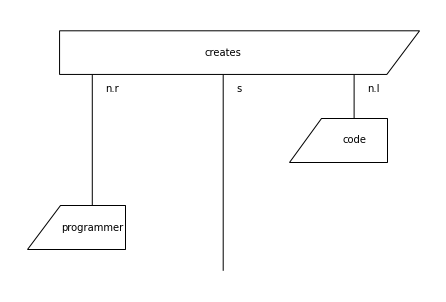

In [18]:
from lambeq import remove_cups

train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

train_diagrams[0].draw()

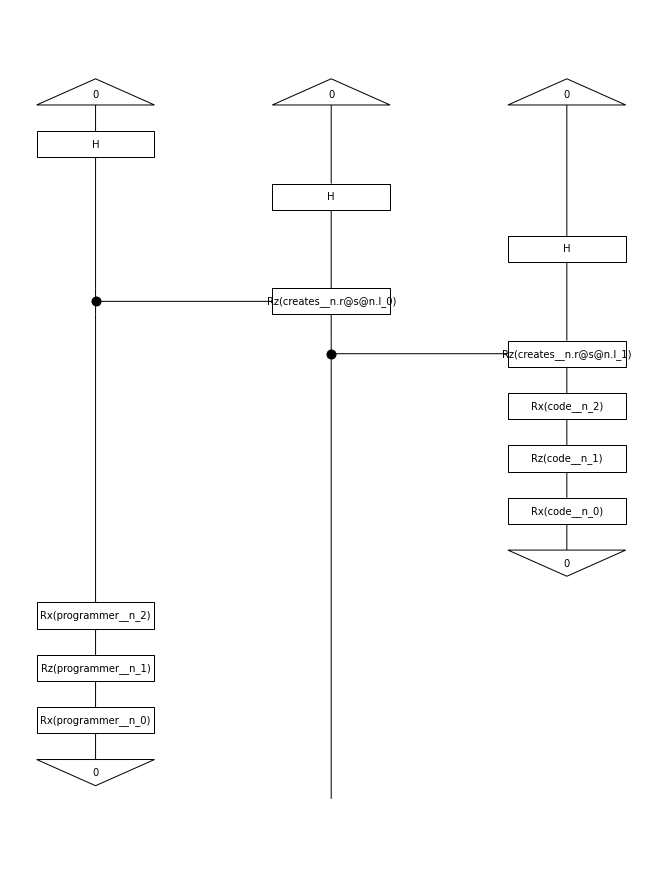

In [19]:
from lambeq import AtomicType, IQPAnsatz

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[0].draw(figsize=(9, 12))

In [20]:
from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits+dev_circuits+test_circuits

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}
model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [21]:
print(len(X_train_new))
print(len(X_val_new))

120
40


In [22]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

In [23]:
BATCH_SIZE = 30
EPOCHS = 50
SEED = 2

In [24]:
from lambeq import QuantumTrainer, SPSAOptimizer
trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose = 'text',
    seed=SEED
)

In [25]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            Y_train_new,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(dev_circuits, Y_val_new, shuffle=False)

In [40]:
#Ran 100 epochs
trainer.fit(train_dataset, val_dataset, logging_step=12)

Epoch 1:   train/loss: 0.1995   valid/loss: 0.2154   train/acc: 0.9667   valid/acc: 0.9500
Epoch 12:  train/loss: 0.1792   valid/loss: 0.1880   train/acc: 0.9833   valid/acc: 0.9750
Epoch 24:  train/loss: 0.2310   valid/loss: 0.1810   train/acc: 0.9917   valid/acc: 0.9750
Epoch 36:  train/loss: 0.1593   valid/loss: 0.1581   train/acc: 0.9917   valid/acc: 0.9500
Epoch 48:  train/loss: 0.1551   valid/loss: 0.1588   train/acc: 0.9833   valid/acc: 0.9500

Training completed!


[[0.81770833 0.18229167]
 [0.22222225 0.77777775]
 [0.90521327 0.09478673]
 ...
 [0.85446009 0.14553991]
 [0.32307693 0.67692307]
 [0.83396226 0.16603774]]
[[0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1]]
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
[[0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
Test accuracy: 0.95


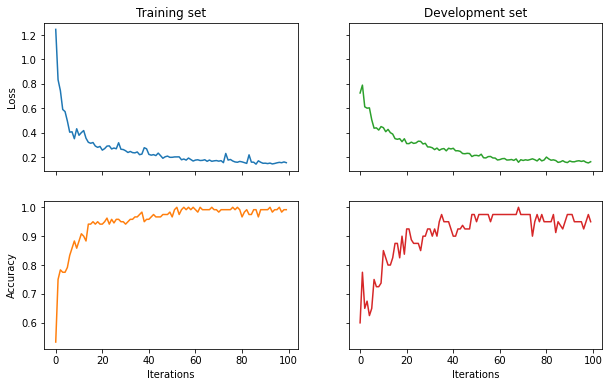

In [41]:
import matplotlib.pyplot as plt

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(trainer.train_results['acc'], color=next(colours))
ax_tr.plot(trainer.val_costs, color=next(colours))
ax_br.plot(trainer.val_results['acc'], color=next(colours))

y_pred = model(test_circuits)
print(y_pred)
print(y_test)
Y_pred = []

y_pred_new = []
for x in y_pred:
    val = x[0]
    if(x[0] > 0.5):
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)

print(y_pred_new)
for i in range(0,len(y_pred)-1,2):
    if(y_pred_new[i] == y_pred_new[i+1]):
        Y_pred.append([1,0])
    else:
        Y_pred.append([0,1])

#test_acc = acc(model(test_circuits), y_test)
print(Y_pred)
test_acc = acc(Y_pred,y_test)
print('Test accuracy:', test_acc)